# Comparación de coordenadas de los puntos AMC

Entre las coordenadas por defecto / de los exámenes sin alteraciones y de los exámenes escaneados

In [1]:
import numpy as np
import json
from pdf2image import convert_from_path
import os
import cv2

from pang_functions import rot
from my_functions import get_trans #, get_rotation # called by get_trans
from pyex_scan import find_qrs_v1, preprocess_img_v1, find_amc_circles_v1

# Ficheros

directorio base

In [2]:
base_dir = '../multiple_choice_example/'

examenes escaneados y rellenados

In [3]:
# scanned exams 1 and 2
ex_file1 = base_dir + 'scanned/scanned_11111.pdf'
ex_file2 = base_dir + 'scanned/scanned_22222.pdf'

# scanned 2 rotated by 45º, 90º and 180º
ex_file2_rot45 = base_dir + 'scanned/scanned_22222_rot45.pdf'
ex_file2_rot90 = base_dir + 'scanned/scanned_22222_rot90.pdf'
ex_file2_rot180 = base_dir + 'scanned/scanned_22222_rot180.pdf'

# filled exams 3 and 4
ex_file3 = base_dir + 'filled/filled_33333.pdf'
ex_file4 = base_dir + 'filled/filled_44444.pdf'

# filled 3 rotated by 90º and 180º
ex_file3_rot90 = base_dir + 'filled/filled_33333_rot90.pdf'
ex_file3_rot180 = base_dir + 'filled/filled_33333_rot180.pdf'

## Default values

dots per inch y tamaños minimos

In [4]:
dpi = 300
line_min_width = int(dpi * 0.17)
circle_min_width = int(dpi * 0.12)

#### Transformaciones obtenidas a partir de los QR, de cuaderno qr_codes

In [5]:
trans2 = [
    [[-58.88 , 32.81], -0.88 , 0.98],
    [[61.88 , 43.40] , -0.13 , 0.95],
    [[-4.78 , 38.56] , -0.28 , 0.97]
]

In [6]:
trans2_90 = [
    [[32.81 , 2520.88] , -90.88 , 0.98],
    [[42.40 , 2401.12] , -90.13 , 0.95],
    [[38.56 , 2466.78] , -90.28 , 0.97]
]

In [7]:
trans2_180 = [
    [[2517.57 , 3418.06] , 179.31 , 0.98],
    [[2401.12 , 3391.60] , 179.87 , 0.95],
    [[2466.78 , 3395.44] , 179.72 , 0.97]
]

In [8]:
trans2_45 = [
    [[2196.51 , -328.51] , 44.61 , 0.98],
    [[2200.13 , -261.68] , 45.76 , 0.95],
    [[2182.95 , -299.73] , 45.53 , 0.97]
]

In [9]:
trans3 = [[[0.00 , 0.00] , 0.00 , 1.00]] * 3

Coordenadas por defecto de los puntos AMC

In [10]:
amc_circles_default = np.array([[1.05333, 0.97], [7.21, 0.97],
                                [1.05333, 11.03], [7.21, 11.03]]) * dpi

funcion para obtener las coordenadas esperadas de los círculos

In [11]:
def get_expected_amc(trans):
    (x0_scan, y0_scan), alpha_scan, scale_scan = trans
    amc_circles_expect = (x0_scan, y0_scan) + scale_scan * amc_circles_default @ rot(alpha_scan)+\
                         np.array([[circle_min_width/2, circle_min_width/2]]) @ rot(alpha_scan)
    return amc_circles_expect

funcion para encontrar los circulos de todas las paginas

In [12]:
def search_all_circles(file, trans):
    pages = convert_from_path(file, dpi=dpi, thread_count=1, fmt='png')
    img_file = 'img_temp.png'
    circles = []
    expected_circles = []
    for i, page in enumerate(pages):
        # always 3 pages in this examples
        page.save(img_file)
        amc_circles_expect = get_expected_amc(trans[i])
        expected_circles.append(amc_circles_expect)
        img = cv2.imread(img_file)
        _, _, img_bin_circles = preprocess_img_v1(img, line_min_width, circle_min_width)
        print('Círculos de AMC del examen %s, de la página %s:' % (file, i+1))
        amc_circles = find_amc_circles_v1(amc_circles_expect, circle_min_width, img_bin_circles, True)
        # do something with the circles
        circles.append(amc_circles)
    if os.path.exists(img_file):
        os.remove(img_file)
    return expected_circles, circles


coordenadas por defecto

Círculos de AMC del examen ../multiple_choice_example/filled/filled_33333.pdf, de la página 1:
y_min (201) y_max (417) x_min (225) x_max(441)
y_min (201) y_max (417) x_min (2073) x_max(2289)
y_min (3219) y_max (3435) x_min (225) x_max(441)
y_min (3219) y_max (3435) x_min (2073) x_max(2289)


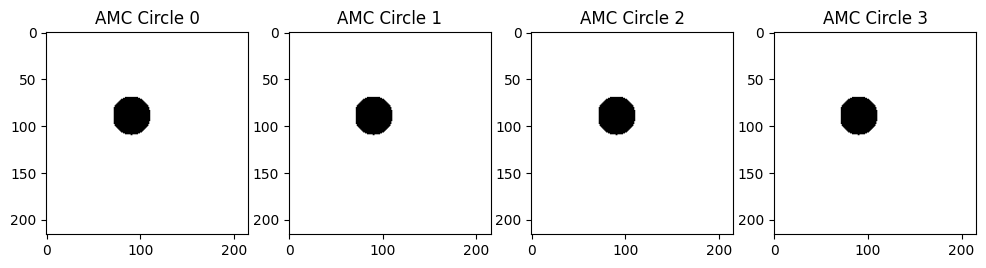

Círculos de AMC del examen ../multiple_choice_example/filled/filled_33333.pdf, de la página 2:
y_min (201) y_max (417) x_min (225) x_max(441)
y_min (201) y_max (417) x_min (2073) x_max(2289)
y_min (3219) y_max (3435) x_min (225) x_max(441)
y_min (3219) y_max (3435) x_min (2073) x_max(2289)


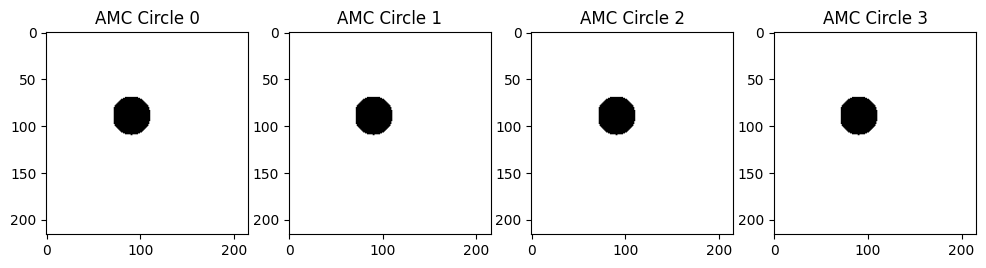

Círculos de AMC del examen ../multiple_choice_example/filled/filled_33333.pdf, de la página 3:
y_min (201) y_max (417) x_min (225) x_max(441)
y_min (201) y_max (417) x_min (2073) x_max(2289)
y_min (3219) y_max (3435) x_min (225) x_max(441)
y_min (3219) y_max (3435) x_min (2073) x_max(2289)


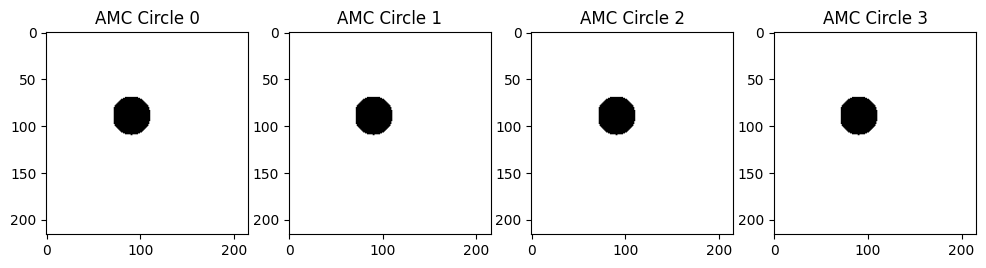

([array([[ 333.999,  309.   ],
         [2181.   ,  309.   ],
         [ 333.999, 3327.   ],
         [2181.   , 3327.   ]]),
  array([[ 333.999,  309.   ],
         [2181.   ,  309.   ],
         [ 333.999, 3327.   ],
         [2181.   , 3327.   ]]),
  array([[ 333.999,  309.   ],
         [2181.   ,  309.   ],
         [ 333.999, 3327.   ],
         [2181.   , 3327.   ]])],
 [[(316.5, 291.5), (2163.5, 291.5), (316.5, 3309.5), (2163.5, 3309.5)],
  [(316.5, 291.5), (2163.5, 291.5), (316.5, 3309.5), (2163.5, 3309.5)],
  [(316.5, 291.5), (2163.5, 291.5), (316.5, 3309.5), (2163.5, 3309.5)]])

In [13]:
default_circles, circles3 = search_all_circles(ex_file3, trans3)
default_circles, circles3

coordenadas en examenes escaneados

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222.pdf, de la página 1:
y_min (222) y_max (438) x_min (165) x_max(381)
y_min (195) y_max (411) x_min (1975) x_max(2191)
y_min (3180) y_max (3396) x_min (210) x_max(426)
y_min (3152) y_max (3368) x_min (2020) x_max(2236)


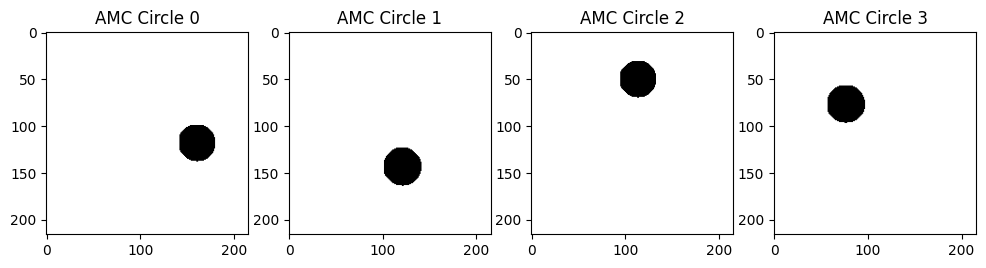

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222.pdf, de la página 2:
y_min (229) y_max (445) x_min (272) x_max(488)
y_min (225) y_max (441) x_min (2027) x_max(2243)
y_min (3096) y_max (3312) x_min (279) x_max(495)
y_min (3092) y_max (3308) x_min (2033) x_max(2249)


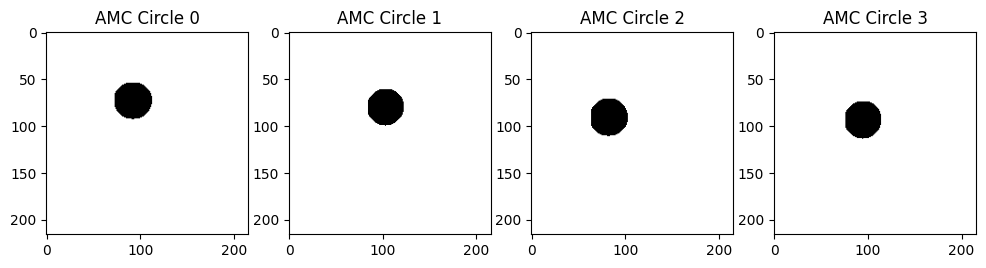

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222.pdf, de la página 3:
y_min (229) y_max (445) x_min (213) x_max(429)
y_min (220) y_max (436) x_min (2004) x_max(2220)
y_min (3156) y_max (3372) x_min (227) x_max(443)
y_min (3147) y_max (3363) x_min (2019) x_max(2235)


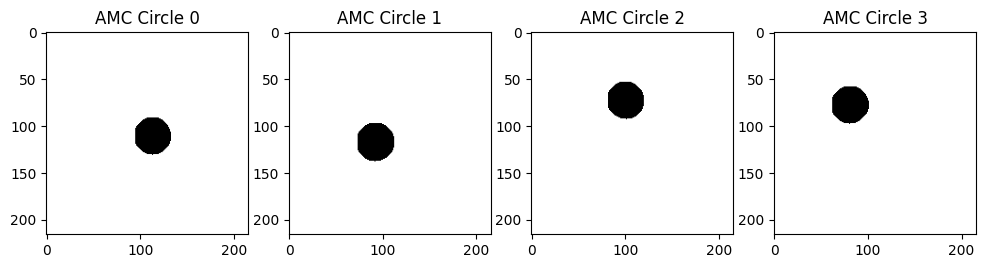

([array([[ 273.41669917,  330.92165068],
         [2083.26419053,  303.12220276],
         [ 318.84100257, 3288.21281022],
         [2128.68849394, 3260.4133623 ]]),
  array([[ 380.74631624,  337.12727196],
         [2135.39274974,  333.14609865],
         [ 387.2515542 , 3204.219892  ],
         [2141.8979877 , 3200.23871869]]),
  array([[ 321.20254512,  337.24052164],
         [2112.77212177,  328.48519133],
         [ 335.50875658, 3264.6655649 ],
         [2127.07833323, 3255.91023459]])],
 [[(326.0, 341.5), (2096.0, 339.5), (324.0, 3231.5), (2097.0, 3230.0)],
  [(365.0, 303.5), (2130.0, 306.5), (362.5, 3188.0), (2128.0, 3187.0)],
  [(327.0, 341.0), (2096.5, 338.5), (328.0, 3230.0), (2100.5, 3226.0)]])

In [14]:
expect_circles2, circles2 = search_all_circles(ex_file2, trans2)
expect_circles2, circles2

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot90.pdf, de la página 1:
y_min (2080) y_max (2296) x_min (222) x_max(438)
y_min (270) y_max (486) x_min (195) x_max(411)
y_min (2035) y_max (2251) x_min (3180) x_max(3396)
y_min (225) y_max (441) x_min (3152) x_max(3368)


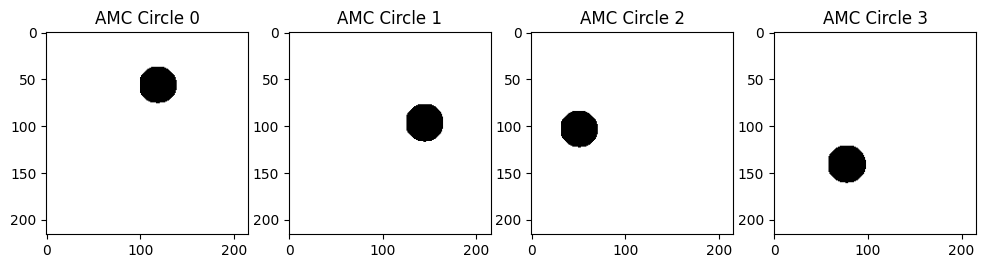

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot90.pdf, de la página 2:
y_min (1974) y_max (2190) x_min (228) x_max(444)
y_min (219) y_max (435) x_min (224) x_max(440)
y_min (1967) y_max (2183) x_min (3095) x_max(3311)
y_min (213) y_max (429) x_min (3091) x_max(3307)


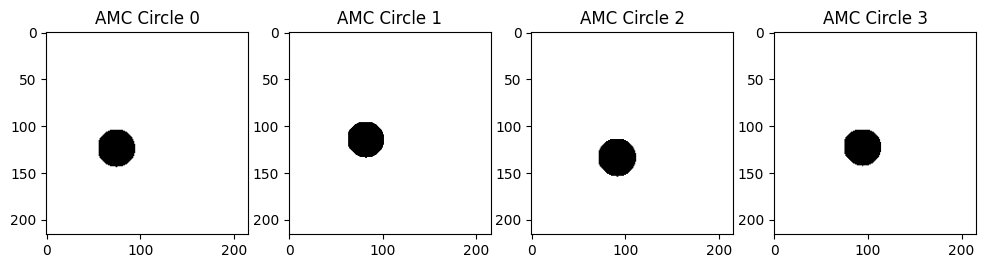

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot90.pdf, de la página 3:
y_min (2032) y_max (2248) x_min (229) x_max(445)
y_min (241) y_max (457) x_min (220) x_max(436)
y_min (2018) y_max (2234) x_min (3156) x_max(3372)
y_min (226) y_max (442) x_min (3147) x_max(3363)


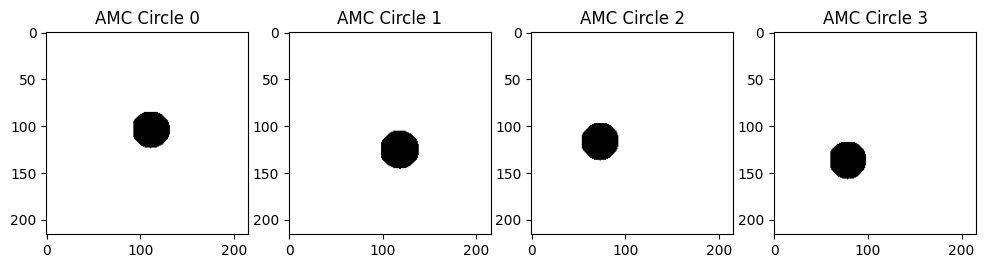

([array([[ 330.92165068, 2188.58330083],
         [ 303.12220276,  378.73580947],
         [3288.21281022, 2143.15899743],
         [3260.4133623 ,  333.31150606]]),
  array([[ 336.12727196, 2082.25368376],
         [ 332.14609865,  327.60725026],
         [3203.219892  , 2075.7484458 ],
         [3199.23871869,  321.1020123 ]]),
  array([[ 337.24052164, 2140.79745488],
         [ 328.48519133,  349.22787823],
         [3264.6655649 , 2126.49124342],
         [3255.91023459,  334.92166677]])],
 [[(341.5, 2137.5), (339.5, 368.0), (3231.5, 2139.5), (3230.0, 367.0)],
  [(303.5, 2099.0), (306.0, 335.0), (3187.0, 2102.0), (3185.5, 337.5)],
  [(341.5, 2137.5), (338.0, 367.5), (3229.5, 2136.0), (3226.0, 364.0)]])

In [15]:
expect_circles2_90, circles2_90 = search_all_circles(ex_file2_rot90, trans2_90)
expect_circles2_90, circles2_90

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot180.pdf, de la página 1:
y_min (3010) y_max (3226) x_min (2078) x_max(2294)
y_min (3032) y_max (3248) x_min (268) x_max(484)
y_min (53) y_max (269) x_min (2042) x_max(2258)
y_min (75) y_max (291) x_min (232) x_max(448)


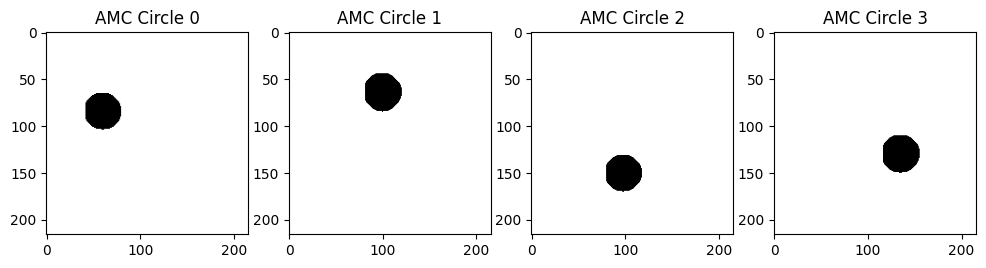

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot180.pdf, de la página 2:
y_min (2989) y_max (3205) x_min (1974) x_max(2190)
y_min (2993) y_max (3209) x_min (219) x_max(435)
y_min (122) y_max (338) x_min (1967) x_max(2183)
y_min (126) y_max (342) x_min (213) x_max(429)


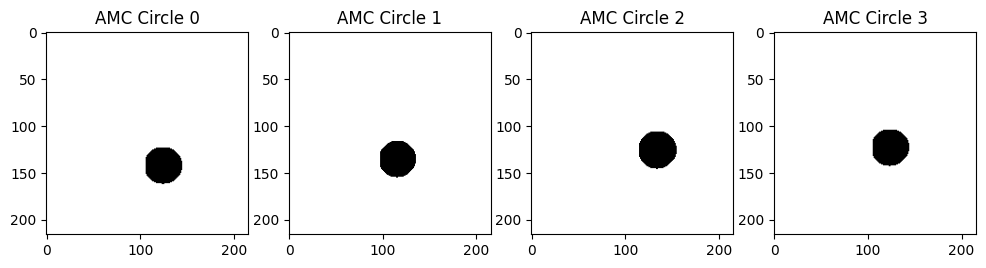

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot180.pdf, de la página 3:
y_min (2988) y_max (3204) x_min (2032) x_max(2248)
y_min (2997) y_max (3213) x_min (241) x_max(457)
y_min (61) y_max (277) x_min (2018) x_max(2234)
y_min (70) y_max (286) x_min (226) x_max(442)


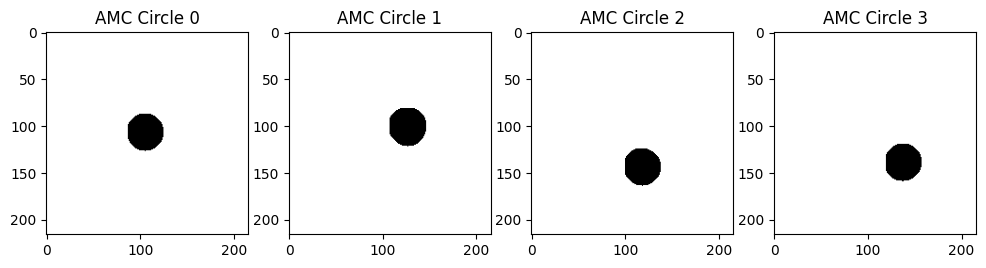

([array([[2186.26370177, 3118.84805287],
         [ 376.33397527, 3140.64567738],
         [2150.64637901,  161.42252111],
         [ 340.7166525 ,  183.22014562]]),
  array([[2082.25368376, 3097.87272804],
         [ 327.60725026, 3101.85390135],
         [2075.7484458 ,  230.780108  ],
         [ 321.1020123 ,  234.76128131]]),
  array([[2140.79745488, 3096.75947836],
         [ 349.22787823, 3105.51480867],
         [2126.49124342,  169.3344351 ],
         [ 334.92166677,  178.08976541]])],
 [[(2139.0, 3095.5), (368.5, 3097.5), (2141.0, 204.5), (367.5, 206.0)],
  [(2099.5, 3132.5), (335.0, 3129.5), (2102.0, 249.0), (337.5, 250.5)],
  [(2138.0, 3096.0), (367.5, 3099.5), (2137.0, 206.0), (364.0, 210.0)]])

In [16]:
expect_circles2_180, circles2_180 = search_all_circles(ex_file2_rot180, trans2_180)
expect_circles2_180, circles2_180

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot45.pdf, de la página 1:
y_min (9) y_max (225) x_min (2108) x_max(2324)
y_min (1280) y_max (1496) x_min (3397) x_max(3600)
y_min (2115) y_max (2331) x_min (31) x_max(247)
y_min (3386) y_max (3600) x_min (1320) x_max(1536)


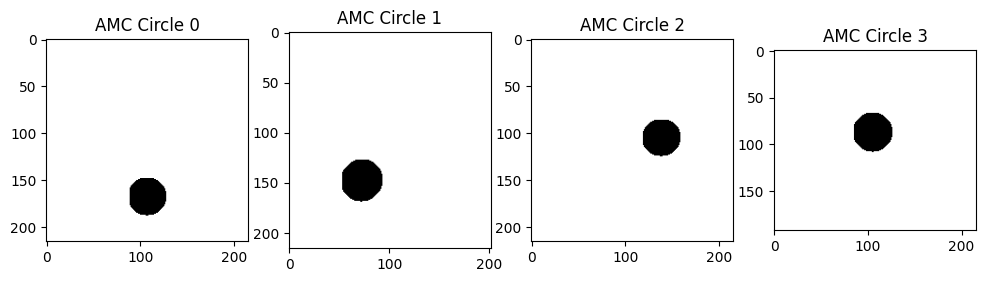

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot45.pdf, de la página 2:
y_min (63) y_max (279) x_min (2103) x_max(2319)
y_min (1320) y_max (1536) x_min (3327) x_max(3543)
y_min (2063) y_max (2279) x_min (49) x_max(265)
y_min (3321) y_max (3537) x_min (1273) x_max(1489)


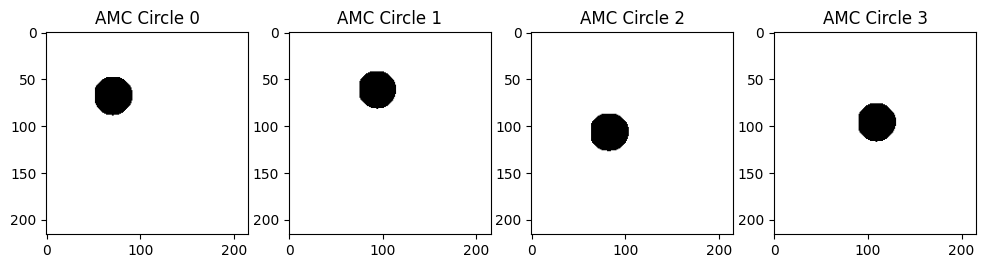

Círculos de AMC del examen ../multiple_choice_example/scanned/scanned_22222_rot45.pdf, de la página 3:
y_min (34) y_max (250) x_min (2088) x_max(2304)
y_min (1312) y_max (1528) x_min (3343) x_max(3559)
y_min (2084) y_max (2300) x_min (1) x_max(214)
y_min (3363) y_max (3579) x_min (1253) x_max(1469)


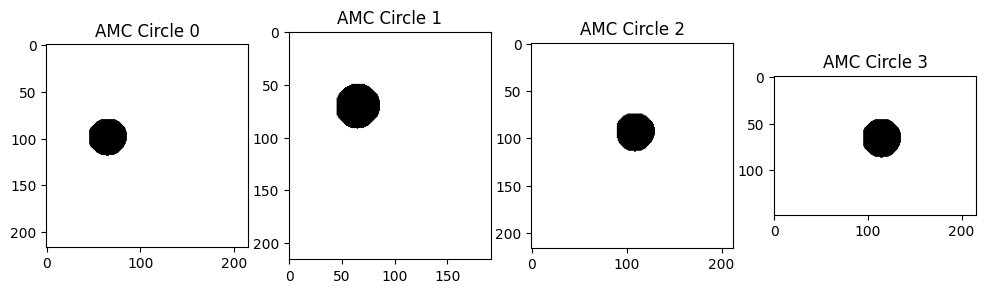

([array([[2216.86940059,  117.4464411 ],
         [3505.4581227 , 1388.61120483],
         [ 139.78592475, 2223.00066838],
         [1428.37464687, 3494.16543211]]),
  array([[2211.17551301,  171.71293322],
         [3435.33482419, 1428.78649399],
         [ 157.11706562, 2171.98949027],
         [1381.2763768 , 3429.06305104]]),
  array([[2196.00928881,  142.2022671 ],
         [3451.08274311, 1420.71266131],
         [ 106.92305133, 2192.99254014],
         [1361.99650564, 3471.50293435]])],
 [[(2216.5, 178.0), (3470.0, 1429.0), (170.0, 2221.5), (1425.5, 3474.0)],
  [(2175.0, 132.5), (3421.5, 1383.0), (133.0, 2171.0), (1383.0, 3418.5)],
  [(2154.0, 133.5), (3408.5, 1383.5), (111.0, 2179.0), (1368.0, 3429.5)]])

In [17]:
expect_circles2_45, circles2_45 = search_all_circles(ex_file2_rot45, trans2_45)
expect_circles2_45, circles2_45

In [18]:
trans2

[[[-58.88, 32.81], -0.88, 0.98],
 [[61.88, 43.4], -0.13, 0.95],
 [[-4.78, 38.56], -0.28, 0.97]]

In [19]:
trans2_amc = []
for page in circles2:
    trans2_amc.append(get_trans(np.array(circles3[0]), np.array(page)))
trans2_amc

[(array([21.11552403, 60.3477897 ]), -0.03242940122628782, 0.9585949829569983),
 (array([62.653854  , 25.09450095]), 0.03692238284058953, 0.955508098595253),
 (array([22.29695376, 60.43058826]), -0.08494851106518561, 0.9581826661268509)]